In [1]:
import numpy as np

dyn_lorenz = {"sigma":16.0, "R":45.92, "b": 4.0}
x0 = np.array([10.0, 1.0, 0.0])
dyn_rossler = {"a": 0.2, "b": 0.2, "c": 5.7 }
x0_rossler= np.array([0.0,0.0,0.0])



def Rossler (x0, dyn):
    a = dyn['a']
    b = dyn['b']
    c = dyn['c']
    x = x0[0]
    y = x0[1]
    z = x0[2]
    return np.array([-(y+z), x+ a*y, b + z*(x-c)])

def RungeKutta (dyn, f, dt, x0):
    k1 = f(x0, dyn)*dt #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1,dyn)*dt
    k3 = f(x0 + 0.5*k2, dyn)*dt
    k4 = f(x0 + k3, dyn)*dt
    
    x = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    return x

def f_t (dyn, f, dt, x0, T):
    x = np.empty(shape=(len(x0),T))
    x[:, 0] = x0    
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1]) 
    return x



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_rossler = f_t(dyn_rossler, Rossler, 0.01, x0_rossler,500)


/tmp/ipykernel_65985/2758675691.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


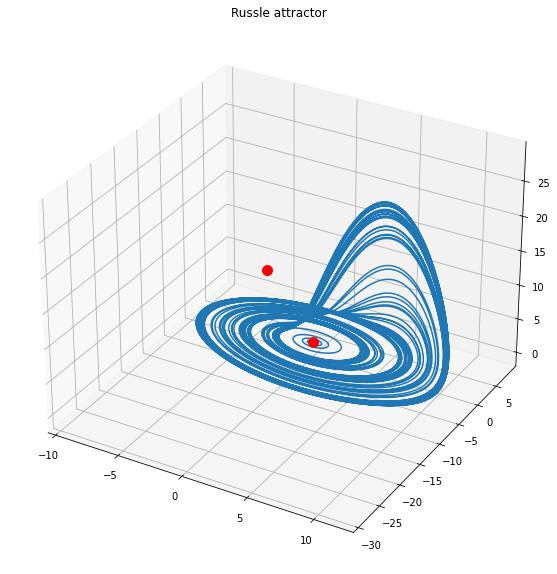

In [50]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection="3d")
ax.plot3D(x_rossler[0], x_rossler[1], x_rossler[2])
ax.scatter3D(  5.6929736, -28.464869,   28.464869 , s=100, c='red', marker='o')
ax.scatter3D(  0.0070262,  -0.03513102,  0.03513102 , s=100, c='red', marker='o')
# ax.scatter(  0,  0,  0 , s=100, c='red', marker='o')
# [ 0.0070262  -0.03513102  0.03513102]
plt.title('Russle attractor')
plt.draw()
plt.savefig('Russle_attractor_no_action.png')

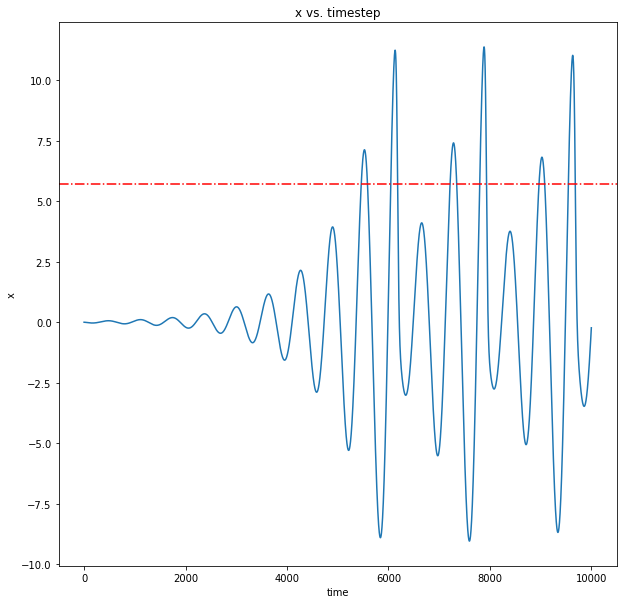

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title('x vs. timestep')
ax.set_xlabel('time')
ax.set_ylabel('x')
ax.plot(np.array(list(range(len(x_rossler[0])))), x_rossler[0])
ax.axhline(y = 5.6929736, color = 'r', linestyle = 'dashdot')
plt.savefig('xvstime0.png')

In [18]:
for i in x_rossler:
    print ('min:', min(i), 'max:', max(i))

min: -9.105457310316586 max: 11.432759390728773
min: -10.790421758135725 max: 7.8401359463825235
min: 0.0 max: 22.84435661911041


In [3]:
IND = 0
SUM = 0.0
ITS = 0
IND2 = 0

DI = np.inf #any large number

NPT = len(x_rossler[0])
DIM = 3 #is dimension 12 ?
dt = 0.01
TAU_physical = 1.5
TAU = int(TAU_physical/dt)
SCALMX = 20
SCALMN = 10
EVOLV_physical = 1.5 #time from t0 to t1
EVOLV = int(EVOLV_physical/dt)

In [4]:
NPT = NPT - DIM*TAU - EVOLV

In [5]:
Z = np.empty([NPT,DIM])

In [6]:
#Z(I,J)=JTH COMPONENT OF ITH RECONSTRUCTED ATTRACTOR POINT
#Z(I,J) = X(I+(J-1)*TAU)
#tau = k*dt
for i in range(int(NPT)):
    for j in range(DIM):
        #Z[i][j-1] = x[0][i + (j-1)*TAU]
        #Z[i][j] = x[0][int(int((i*dt + (j-1)*dt*TAU))/dt)]
        Z[i][j] = x_rossler[0][i + (j-1)*TAU]

/tmp/ipykernel_240341/2077411021.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


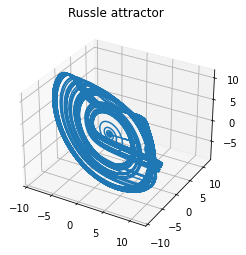

In [7]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(Z[:,0], Z[:,1], Z[:,2])
plt.title('Russle attractor')
plt.draw()

In [8]:
#find nearest neighbor to the first data point
for i in range(1, int(NPT)):
    D = 0.0
    #iterate through the array, compare first point with the rest
    D = np.linalg.norm(Z[IND] - Z[i])
    if ((D<DI) and (D>=SCALMN)):
        DI = D
        IND2 = i

In [9]:
IND2

34956

In [10]:
SUM_list = []
while ((IND + EVOLV < NPT) and (IND2 + EVOLV < NPT)): #40
    PT1 = Z[IND+EVOLV] #would this be the dimesion
    PT2 = Z[IND2+EVOLV]
    DF = np.linalg.norm(PT1 - PT2)
    ITS = ITS + 1
    SUM_list.append(SUM)
    SUM = SUM + np.log2(DF/DI)/EVOLV_physical
    ZLYAP = SUM/float(ITS)
    
    INDOLD = IND2
    ZMULT = 1.0
    ANGLMX = 0.3
    #THMIN = 3.14
    while (True): #70
        #print("here")
        THMIN = 3.14

        for i in range (int(NPT)): #100
            III = int(np.absolute(i-(IND+EVOLV)))
            if (III >= 10):
                #find angular change old to new vector
                DNEW = 0.0
                DNEW = np.linalg.norm(PT1 - Z[i])
                if ((DNEW <= ZMULT*SCALMX) and (DNEW >= SCALMN)):
                    DOT = 0.0
                    DOT = np.dot((PT1 - Z[i]),(PT1 - PT2))
                    CTH = np.absolute(DOT/(DNEW*DF))
                    #print(CTH)
                    if (CTH > 1.0):
                        CTH = 1.0
                    TH = np.arccos(CTH)
                    #save smallest angular change so far
                    if TH <= THMIN:
                        THMIN = TH
                        DII = DNEW
                        IND2 = i
        if (THMIN < ANGLMX):
            #print ("here")
            break
        # look at longer distance if cant find replacement
        ZMULT = ZMULT + 1
        if (ZMULT > 5):
            #no replacement at 5*scale, double search angle, reset distance
            ZMULT = 1.0
            ANGLMX = 2.0*ANGLMX
        if (ANGLMX >= 3.14):
            IND2 = INDOLD + EVOLV
            DII = DF
    IND = IND + EVOLV
    if (IND > NPT):
        print('here')
        break
    print ("IND, IND2, NPT", IND, IND2, NPT)
    DI = DII

IND, IND2, NPT 150 13172 49400
IND, IND2, NPT 300 13322 49400
IND, IND2, NPT 450 18234 49400
IND, IND2, NPT 600 25992 49400
IND, IND2, NPT 750 26142 49400
IND, IND2, NPT 900 13173 49400
IND, IND2, NPT 1050 13323 49400
IND, IND2, NPT 1200 18235 49400
IND, IND2, NPT 1350 25987 49400
IND, IND2, NPT 1500 26137 49400
IND, IND2, NPT 1650 13167 49400
IND, IND2, NPT 1800 13317 49400
IND, IND2, NPT 1950 45132 49400
IND, IND2, NPT 2100 17806 49400
IND, IND2, NPT 2250 17956 49400
IND, IND2, NPT 2400 13172 49400
IND, IND2, NPT 2550 13322 49400
IND, IND2, NPT 2700 18244 49400
IND, IND2, NPT 2850 17815 49400
IND, IND2, NPT 3000 17965 49400
IND, IND2, NPT 3150 12876 49400
IND, IND2, NPT 3300 13026 49400
IND, IND2, NPT 3450 13176 49400
IND, IND2, NPT 3600 13326 49400
IND, IND2, NPT 3750 8848 49400
IND, IND2, NPT 3900 30071 49400
IND, IND2, NPT 4050 30221 49400
IND, IND2, NPT 4200 30371 49400
IND, IND2, NPT 4350 30521 49400
IND, IND2, NPT 4500 30671 49400
IND, IND2, NPT 4650 30821 49400
IND, IND2, NPT 

IND, IND2, NPT 37800 33529 49400
IND, IND2, NPT 37950 33679 49400
IND, IND2, NPT 38100 33829 49400
IND, IND2, NPT 38250 14044 49400
IND, IND2, NPT 38400 14194 49400
IND, IND2, NPT 38550 14344 49400
IND, IND2, NPT 38700 15669 49400
IND, IND2, NPT 38850 15819 49400
IND, IND2, NPT 39000 15969 49400
IND, IND2, NPT 39150 16119 49400
IND, IND2, NPT 39300 16269 49400
IND, IND2, NPT 39450 16419 49400
IND, IND2, NPT 39600 16569 49400
IND, IND2, NPT 39750 16719 49400
IND, IND2, NPT 39900 16869 49400
IND, IND2, NPT 40050 17019 49400
IND, IND2, NPT 40200 17169 49400
IND, IND2, NPT 40350 17319 49400
IND, IND2, NPT 40500 32698 49400
IND, IND2, NPT 40650 32848 49400
IND, IND2, NPT 40800 32998 49400
IND, IND2, NPT 40950 33148 49400
IND, IND2, NPT 41100 33298 49400
IND, IND2, NPT 41250 33448 49400
IND, IND2, NPT 41400 33598 49400
IND, IND2, NPT 41550 33748 49400
IND, IND2, NPT 41700 15149 49400
IND, IND2, NPT 41850 15299 49400
IND, IND2, NPT 42000 15449 49400
IND, IND2, NPT 42150 15599 49400
IND, IND2,

Text(0.5, 0, 'iteration')

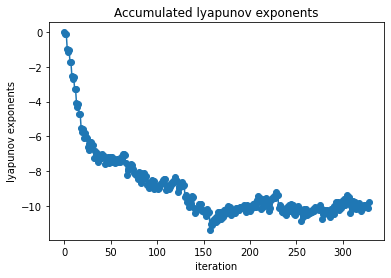

In [11]:
import matplotlib.pyplot as plt

plt.plot(SUM_list)
plt.scatter(range(len(SUM_list)),SUM_list)
plt.title('Accumulated lyapunov exponents')
plt.ylabel('lyapunov exponents')
plt.xlabel('iteration')
# plt.savefig('russle_tau34.png')